# Assignment 3

In [1]:
#!pip install tensorflow

In [1]:
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
import itertools
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Import the Keras API from Tensorflow

In [81]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D ,Dropout ,BatchNormalization
# from tensorflow.keras import backend as K

In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

# Importing Images

In [5]:
#importing train and validation set
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img =io.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            
    return images

root_folder = "plant_imgs\\training"
folder_1 = [os.path.join(root_folder,'1')]
folder_1 = [img for folder in folder_1 for img in load_images_from_folder(folder)]
folder_2 = [os.path.join(root_folder,'2')]
folder_2 = [img for folder in folder_2 for img in load_images_from_folder(folder)]
folder_3 = [os.path.join(root_folder,'3')]
folder_3 = [img for folder in folder_3 for img in load_images_from_folder(folder)]
folder_4 = [os.path.join(root_folder,'4')]
folder_4 = [img for folder in folder_4 for img in load_images_from_folder(folder)]

folder_6 = [os.path.join(root_folder,'6')]
folder_6 = [img for folder in folder_6 for img in load_images_from_folder(folder)]

all_folders=[folder_1,folder_2,folder_3,folder_4,folder_6]

In [6]:
#importing test set
root_folder = "plant_imgs\\testing"

folder_1= [os.path.join(root_folder,'1')]
folder1_test = [img for folder in folder_1 for img in load_images_from_folder(folder)]
folder_2 = [os.path.join(root_folder,'2')]
folder2_test = [img for folder in folder_2 for img in load_images_from_folder(folder)]
folder_3 = [os.path.join(root_folder,'3')]
folder3_test = [img for folder in folder_3 for img in load_images_from_folder(folder)]
folder_4 = [os.path.join(root_folder,'4')]
folder4_test= [img for folder in folder_4 for img in load_images_from_folder(folder)]
folder_6 = [os.path.join(root_folder,'6')]
folder6_test = [img for folder in folder_6 for img in load_images_from_folder(folder)]

all_test_folders=[folder1_test,folder2_test,folder3_test,folder4_test,folder6_test]

creating an empty list called label and append i which is vary from 0:4 as we have 5 different folders

In [7]:
label=[]

for i in range(len(all_folders)):
    for j in range(len(all_folders[i])):
        label.append(i)

In [8]:
y_test=[]

for i in range(len(all_test_folders)):
    for j in range(len(all_test_folders[i])):
        y_test.append(i)

In [9]:
len(y_test)

100

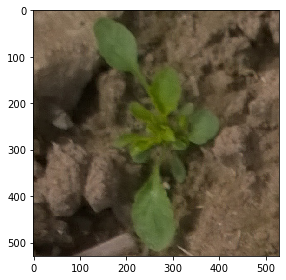

In [10]:
io.imshow(leaf_6[0])

In [11]:
for i in range(len(all_folders)):
    for j in range(len(all_folders[i])):
        all_folders[i][j] = resize(all_folders[i][j], (64, 64))
all_images=list(itertools.chain.from_iterable(all_folders))


In [12]:
for i in range(len(all_test_folders)):
    for j in range(len(all_test_folders[i])):
        all_test_folders[i][j] = resize(all_test_folders[i][j], (64, 64))
X_test=list(itertools.chain.from_iterable(all_test_folders))


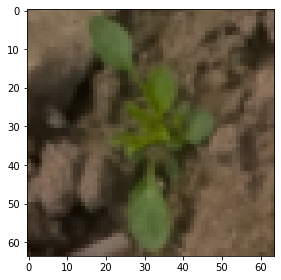

In [13]:
io.imshow(leaf_6[0])

# 3.1 Classification Network

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_vald, y_train, y_vald = train_test_split(all_images, label, test_size=.20 , random_state=42)

print('length of training:', len(X_train))
print('length of Validation:', len(X_vald))

length of training: 720
length of Validation: 180


In [15]:
X_train=np.array(X_train)
X_vald = np.array(X_vald)
#all_images=np.array(all_images)
X_test=np.array(X_test)

In [16]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

In [17]:
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [18]:
from keras.models import Sequential
model = Sequential()
for layer in vgg_model.layers[:7]: # go through until last layer
    model.add(layer)
for layer in vgg_model.layers:
    layer.trainable = False

In [19]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        3

In [21]:
from tensorflow.keras.models import Model
model_transfer = Model(inputs=model.input, outputs=model.output)

print(model_transfer.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [22]:
nClasses = 5
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_vald_k = tensorflow.keras.utils.to_categorical(y_vald, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses)

In [23]:
batchSize = 128
nEpochs = 32


sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0008)
model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_transfer.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_vald, y_vald_k))

C:\Users\ayamo\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/32
6/6 [==============================] - 4s 627ms/step - loss: 4.1926 - accuracy: 0.2056 - val_loss: 2.8458 - val_accuracy: 0.1944
Epoch 2/32
6/6 [==============================] - 3s 567ms/step - loss: 2.5515 - accuracy: 0.2111 - val_loss: 2.5166 - val_accuracy: 0.2333
Epoch 3/32
6/6 [==============================] - 7s 1s/step - loss: 2.1851 - accuracy: 0.2514 - val_loss: 2.2779 - val_accuracy: 0.2222
Epoch 4/32
6/6 [==============================] - 8s 1s/step - loss: 2.0057 - accuracy: 0.2653 - val_loss: 2.2786 - val_accuracy: 0.2389
Epoch 5/32
6/6 [==============================] - 8s 1s/step - loss: 1.8580 - accuracy: 0.2958 - val_loss: 2.0810 - val_accuracy: 0.2278
Epoch 6/32
6/6 [==============================] - 7s 1s/step - loss: 1.7924 - accuracy: 0.2958 - val_loss: 2.1530 - val_accuracy: 0.2444
Epoch 7/32
6/6 [==============================] - 7s 1s/step - loss: 1.6885 - accuracy: 0.3250 - val_loss: 1.9938 - val_accuracy: 0.2444
Epoch 8/32
6/6 [===================

Test the Model on the training set:

In [24]:
y_predict_prob = model_transfer.predict(X_train)
y_predict = y_predict_prob.argmax(axis=-1)

In [25]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[119   9  14   0   3]
 [ 25  87  27   1   2]
 [  7   9 116   3   4]
 [  9  23  33  74  10]
 [ 10  21  35   3  76]]


In [26]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

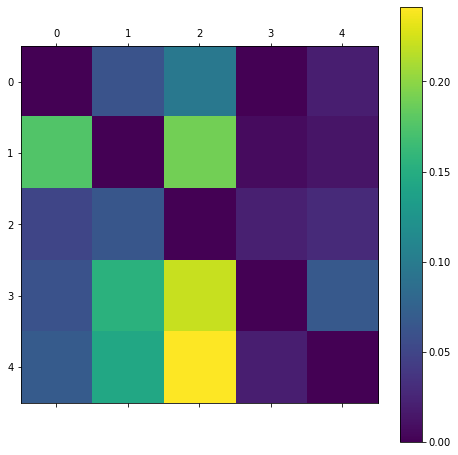

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

Test the model on the Validation set

In [ ]:
y_predict_prob = model_transfer.predict(X_vald)
y_predict = y_predict_prob.argmax(axis=-1)

In [105]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_vald, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[20  9  5  0  1]
 [ 9 13  9  5  2]
 [14  8 11  4  4]
 [ 8  4 10  2  7]
 [ 6 12  6  2  9]]


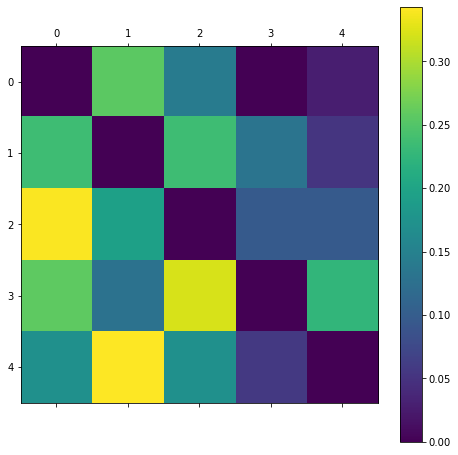

In [30]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

Learning Curve between train and validation :

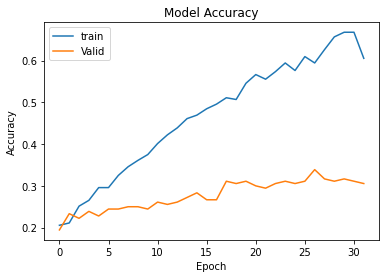

In [34]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Valid'], loc='upper left')
    plt.show()


from the previous figure,Model is obviously overfitting as the training accuracy is greater than validation accuracy.
Overfitting negatively affects the model ability to generalize

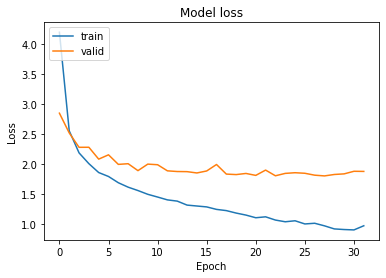

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


from Learning Curves:
- train learning curve :indicates how well the model is learning which is calculated from the training set.
- Valid learning curve :indicates how well the model is generalizing.

From the previous figure, the learning curve for training loss shows improvement as the learning curve for validation loss that shows improvement, however a lage gap between both still exist.

This may happened because the training dataset does not provide sufficient information to learn "as as result of having quite small dataset" , according to the validation dataset used to evaluate it.


test the model on the Test set :

In [31]:
y_predict_prob = model_transfer.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [32]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[10  5  3  1  1]
 [ 5  4  8  1  2]
 [ 5  5  6  3  1]
 [ 4  7  5  1  3]
 [ 3  7  6  1  3]]


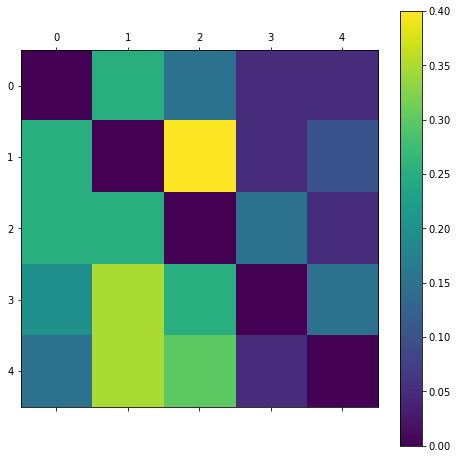

In [33]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

# 3.2 Basic Transfer Learning: Regression Network

In [36]:
def classes_org(classes_list):
    if classes_list==0:
        classes_list=1
    elif classes_list==1:
        classes_list=2
    elif classes_list==2:
        classes_list=3
    elif classes_list ==3:
        classes_list=4
    elif classes_list==4:
        classes_list=6
    return classes_list

In [47]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))

In [48]:
y_train_reg=[]
for i in range(len(y_train)):
    y_train_reg.append(classes_org(y_train[i]))
    
y_vald_reg=[]
for i in range(len(y_vald)):
    y_vald_reg.append(classes_org(y_vald[i]))

y_test_reg=[]
for i in range(len(y_test)):
    y_test_reg.append(classes_org(y_test[i]))

In [49]:
model_reg = Sequential()
for layer in vgg_model.layers[:7]: # go through until last layer
    model_reg.add(layer)
for layer in vgg_model.layers:
    layer.trainable = False

In [50]:
model_reg.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model_reg.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))
model_reg.add(Flatten())
model_reg.add(Dense(256, activation='leaky_relu'))
model_reg.add(Dense(1, activation='leaky_relu'))
print(model_reg.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)       

In [51]:
from tensorflow.keras.models import Model
model_transfer_reg = Model(inputs=model_reg.input, outputs=model_reg.output)

print(model_transfer_reg.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [52]:
X_train=np.array(X_train)
X_vald = np.array(X_vald)
X_test=np.array(X_test)

y_train_reg=np.array(y_train_reg)
y_vald_reg = np.array(y_vald_reg)
y_test_reg = np.array(y_test_reg)


In [53]:
batchSize = 128
nEpochs = 32


adam = tensorflow.keras.optimizers.Adam(learning_rate=0.08)
model_transfer_reg.compile(loss='mean_squared_error', 
                           optimizer=adam, 
                           metrics=['mean_squared_error'])


history = model_transfer_reg.fit(X_train, y_train_reg, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_vald, y_vald_reg))

Epoch 1/32
6/6 [==============================] - 4s 602ms/step - loss: 717661011968.0000 - mean_squared_error: 717661011968.0000 - val_loss: 14.3731 - val_mean_squared_error: 14.3731
Epoch 2/32
6/6 [==============================] - 5s 947ms/step - loss: 14.1567 - mean_squared_error: 14.1567 - val_loss: 11.0812 - val_mean_squared_error: 11.0812
Epoch 3/32
6/6 [==============================] - 8s 1s/step - loss: 8.3995 - mean_squared_error: 8.3995 - val_loss: 4.6998 - val_mean_squared_error: 4.6998
Epoch 4/32
6/6 [==============================] - 7s 1s/step - loss: 3.8913 - mean_squared_error: 3.8913 - val_loss: 2.9572 - val_mean_squared_error: 2.9572
Epoch 5/32
6/6 [==============================] - 8s 1s/step - loss: 3.0579 - mean_squared_error: 3.0579 - val_loss: 3.0687 - val_mean_squared_error: 3.0687
Epoch 6/32
6/6 [==============================] - 8s 1s/step - loss: 3.2821 - mean_squared_error: 3.2821 - val_loss: 3.5972 - val_mean_squared_error: 3.5972
Epoch 7/32
6/6 [========

Test the model on the training dataset :

In [56]:
y_predict_prob = model_transfer_reg.predict(X_train)

In [65]:
print("Evaluate on training Set")
results = model_transfer_reg.evaluate(X_train, y_train_reg, batch_size=128)
print("Training loss,Training loss:", results)

Evaluate on training Set
6/6 [==============================] - 3s 414ms/step - loss: 3.8084 - mean_squared_error: 3.8084
Training loss,Training loss: [3.8083739280700684, 3.8083739280700684]


test the model on the Validation Set :

In [58]:
y_predict_prob = model_transfer.predict(X_vald)

In [66]:
print("Evaluate on the Validation Set")
results = model_transfer_reg.evaluate(X_vald, y_vald_reg, batch_size=128)
print("Validation loss, Validation loss:", results)

Evaluate on the Validation Set
2/2 [==============================] - 1s 182ms/step - loss: 3.8220 - mean_squared_error: 3.8220
Validation loss, Validation loss: [3.821990966796875, 3.821990966796875]


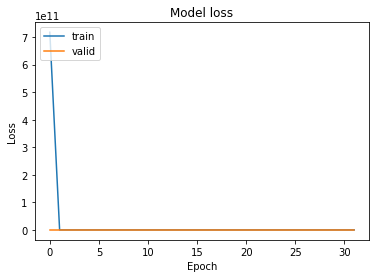

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

the validation learning rate indicates that the model is stuck at somepoint and it is not able to learn.

Test the model on the testing set :

In [68]:
y_predict_prob = model_transfer.predict(X_test)

In [69]:
print("Evaluate on the Testing Set")
results = model_transfer_reg.evaluate(X_test, y_test_reg, batch_size=128)
print("Test loss,Test loss:", results)

Evaluate on the Testing Set
1/1 [==============================] - 0s 346ms/step - loss: 3.8111 - mean_squared_error: 3.8111
Test loss,Test loss: [3.8110973834991455, 3.8110973834991455]


# 3.3 Discussion

For the Classification Network :

- from the model accuracy model, Obviously the model is overfitting as the training accuracy is greater than validation accuracy

training model is not all about gaining higher accuracy in train set but in validation set. Overfitting negatively affects the model ability to generalize.
So, to tackle this issue "overfitting" Regularization or augmentation should be applied to improve the model performance on unseen data.

- from Learning Curves:
   - train learning curve :indicates how well the model is learning which is calculated from the training set.
   - Valid learning curve :indicates how well the model is generalizing.

From the previous loss figure for the classification network ,we can see that the learning curve for training loss shows improvement as the learning curve for validation loss that shows improvement, however a lage gap between both still exist.

This may happened because the training dataset does not provide sufficient information to learn "as as result of having quite small dataset" , according to the validation dataset used to evaluate it "Unrepresentative Train Dataset".


- For the Regression Network:
loss curve was used to evaluate this model's performance which is calcualted using mean_squared_error.
the validation learning rate indicates that the model is stuck at somepoint and it is not able to learn.

As a conclusion: Classification model is much better than the regression one.
However, it also needs some edits and adds to overcome the overfitting issue by using regularization and augmentation.
So, Classification model will be chosen for the further steps.


# 4.1 Regularization

In [86]:
from tensorflow.keras.applications import VGG16
 
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64, 3))
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [87]:
from keras.models import Sequential
model_after_reg = Sequential()
for layer in vgg_model.layers[:7]: # go through until last layer
    model_after_reg.add(layer)
for layer in vgg_model.layers:
    layer.trainable = False

In [88]:
model_after_reg.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model_after_reg.add(BatchNormalization())
model_after_reg.add(MaxPooling2D(pool_size=(2, 2)))
model_after_reg.add(Dropout(0.2))
model_after_reg.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model_after_reg.add(Flatten())
model_after_reg.add(Dense(256, activation='relu'))
model_after_reg.add(Dropout(0.1))
model_after_reg.add(Dense(5, activation='softmax'))

In [89]:
from tensorflow.keras.models import Model
model_transfer_after = Model(inputs=model_after_reg.input, outputs=model_after_reg.output)

print(model_transfer_after.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [90]:
batchSize = 128
nEpochs = 32

sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0008)
model_transfer_after.compile(loss='categorical_crossentropy', 
                           optimizer=sgd, 
                           metrics=['accuracy'])


history = model_transfer_after.fit(X_train, y_train_k, batch_size=batchSize, epochs=nEpochs, verbose=1, 
                                 validation_data=(X_vald, y_vald_k))

Epoch 1/32
6/6 [==============================] - 4s 587ms/step - loss: 2.0365 - accuracy: 0.1903 - val_loss: 4.2574 - val_accuracy: 0.2278
Epoch 2/32
6/6 [==============================] - 3s 557ms/step - loss: 1.9697 - accuracy: 0.2042 - val_loss: 3.1070 - val_accuracy: 0.2389
Epoch 3/32
6/6 [==============================] - 8s 1s/step - loss: 1.9439 - accuracy: 0.1986 - val_loss: 2.5887 - val_accuracy: 0.2167
Epoch 4/32
6/6 [==============================] - 8s 1s/step - loss: 1.9599 - accuracy: 0.2069 - val_loss: 2.3338 - val_accuracy: 0.2278
Epoch 5/32
6/6 [==============================] - 8s 1s/step - loss: 1.8552 - accuracy: 0.2153 - val_loss: 2.1884 - val_accuracy: 0.2222
Epoch 6/32
6/6 [==============================] - 8s 1s/step - loss: 1.8713 - accuracy: 0.2333 - val_loss: 2.0992 - val_accuracy: 0.2389
Epoch 7/32
6/6 [==============================] - 7s 1s/step - loss: 1.8741 - accuracy: 0.2292 - val_loss: 2.0213 - val_accuracy: 0.2556
Epoch 8/32
6/6 [===================

Test the model after Regularization on the training Set :

In [98]:
y_predict_prob = model_transfer_after.predict(X_train)
y_predict = y_predict_prob.argmax(axis=-1)

In [99]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[60 14 30 18 23]
 [23 24 36 27 32]
 [19 14 37 40 29]
 [15  8 26 69 31]
 [18 12 27 29 59]]


Test the model after Regularization on the Validation Set:

In [106]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_vald, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[20  9  5  0  1]
 [ 9 13  9  5  2]
 [14  8 11  4  4]
 [ 8  4 10  2  7]
 [ 6 12  6  2  9]]


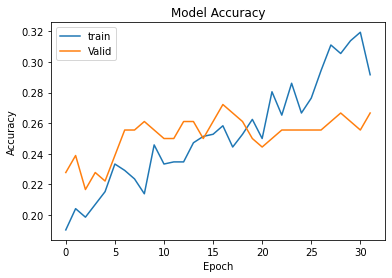

In [109]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Valid'], loc='upper left')
    plt.show()


Regularization has showed promissing results in terms of accuracy compared with the intial classifier in Q3.1 and partially the model is able to overcome the overfitting issue which was obviously exists in the begining.

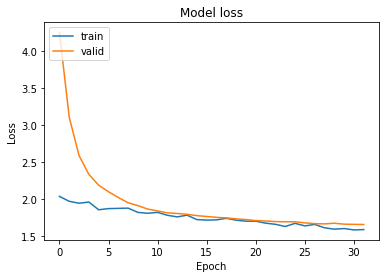

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


for the loss curves we can see that: The plot of training loss decreases to a point of stability. The plot of validation loss approximately decreases to a point of stability and has a small gap with the training loss

Test the model after Regularization on the Testing Set:

In [107]:
y_predict_prob = model_transfer_after.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [108]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[9 1 6 2 2]
 [5 3 6 3 3]
 [2 3 6 6 3]
 [3 5 3 4 5]
 [2 3 7 3 5]]


# 5. Data Augmentation

In [111]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [131]:
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
history_augmentation = model_transfer_after.fit(datagen.flow(X_train, y_train_k, batch_size=batchSize),epochs=60, verbose=1, 
                                    validation_data=(X_vald, y_vald_k))

Epoch 1/60
6/6 [==============================] - 3s 576ms/step - loss: 1.6514 - accuracy: 0.2597 - val_loss: 1.5931 - val_accuracy: 0.3056
Epoch 2/60
6/6 [==============================] - 3s 583ms/step - loss: 1.6679 - accuracy: 0.2708 - val_loss: 1.5950 - val_accuracy: 0.2944
Epoch 3/60
6/6 [==============================] - 4s 574ms/step - loss: 1.6495 - accuracy: 0.2556 - val_loss: 1.5930 - val_accuracy: 0.2944
Epoch 4/60
6/6 [==============================] - 4s 584ms/step - loss: 1.6860 - accuracy: 0.2486 - val_loss: 1.5878 - val_accuracy: 0.3167
Epoch 5/60
6/6 [==============================] - 6s 1s/step - loss: 1.6375 - accuracy: 0.2583 - val_loss: 1.5898 - val_accuracy: 0.3167
Epoch 6/60
6/6 [==============================] - 9s 1s/step - loss: 1.6432 - accuracy: 0.2931 - val_loss: 1.5879 - val_accuracy: 0.3111
Epoch 7/60
6/6 [==============================] - 8s 1s/step - loss: 1.6779 - accuracy: 0.2458 - val_loss: 1.5892 - val_accuracy: 0.2889
Epoch 8/60
6/6 [=============

Test the model after augmentation on the training Set :

In [132]:
y_predict_prob = model_transfer_after.predict(X_train)
y_predict = y_predict_prob.argmax(axis=-1)

In [133]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[96 11 18  8 12]
 [33 29 32 31 17]
 [17 20 37 37 28]
 [ 9 11 21 79 29]
 [ 8 11 19 39 68]]


Test the model after augmentation on the Validation set :

In [134]:
y_predict_prob = model_transfer_after.predict(X_vald)
y_predict = y_predict_prob.argmax(axis=-1)

In [135]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_vald, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[21  2  2  5  5]
 [10 12  4  9  3]
 [ 6  7  9 14  5]
 [ 3  6  4 12  6]
 [ 2  4  7  8 14]]


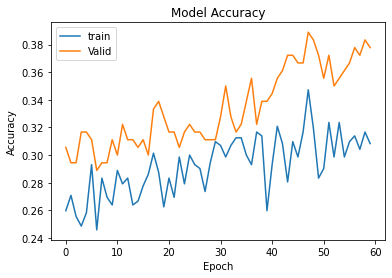

In [136]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history_augmentation.history :
    k = 'accuracy'    

if 'acc' in history_augmentation.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history_augmentation.history[k])
    plt.plot(history_augmentation.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'Valid'], loc='upper left')
    plt.show()


After augmentation the model was much better in tackling the overfitting issue which was obviously exists in the      begining Q1.3 and even more better than Q4.1 as the validation accuracy is greater than the training accuracy

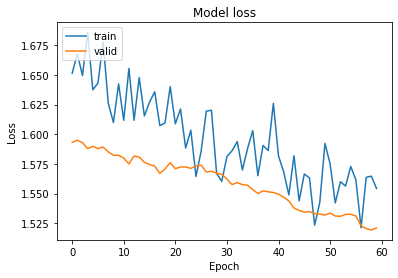

In [137]:
plt.plot(history_augmentation.history['loss'])
plt.plot(history_augmentation.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

The training curve fluctuats alot ,it maybe beacuse the model is struggling in the learning phase after augmenting the dataset ,however, it doesn't reached the optimal point yet.

Test the model after augmentation on the test set :

In [138]:
y_predict_prob = model_transfer_after.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [139]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_predict)
print('Confusion matrix: \n{0}'.format(conf_mx))

Confusion matrix: 
[[9 1 2 3 5]
 [6 5 2 5 2]
 [0 6 5 6 3]
 [3 2 4 6 5]
 [1 4 4 6 5]]


# 5.1 Discussion

For Regularization :

Regularization has showed promissing results in terms of accuracy compared with the intial classifier in Q3.1 and partially the model is able to overcome the overfitting issue which was obviously exists in the begining.

for the loss curves we can see that:
The plot of training loss decreases to a point of stability.
The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

The loss of the model after regularization was almost lower on the training dataset than the validation dataset which means 

- For Augmentation :
By doing Data augmentation this means that the model will have a much harder time learning features of individual images that weren't included in that class. when we add those variations , the model is supposed to learn better features and be more general.

- For the model accuracy Learning curves:

   - After augmentation the model was much better in tackling the overfitting issue which was obviously exists in the      begining Q1.3 and even more better than Q4.1 as the validation accuracy is greater than the training accuracy. 
   
- for the loss curve:

As we can see, the training curve fluctuats alot ,it maybe beacuse the model is struggling in the learning phase after augmenting the dataset however it doesn't reached the optimal point yet.
